C:\Users\jonas\AppData\Local\Temp\ipykernel_67956\296903546.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(retrievers, rotation=90)
C:\Users\jonas\AppData\Local\Temp\ipykernel_67956\296903546.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(retrievers, rotation=90)
C:\Users\jonas\AppData\Local\Temp\ipykernel_67956\296903546.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(retrievers, rotation=90)
C:\Users\jonas\AppData\Local\Temp\ipykernel_67956\296903546.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(retrievers, rotation=90)
C:\Users\jonas\AppData\Local\Temp\ip

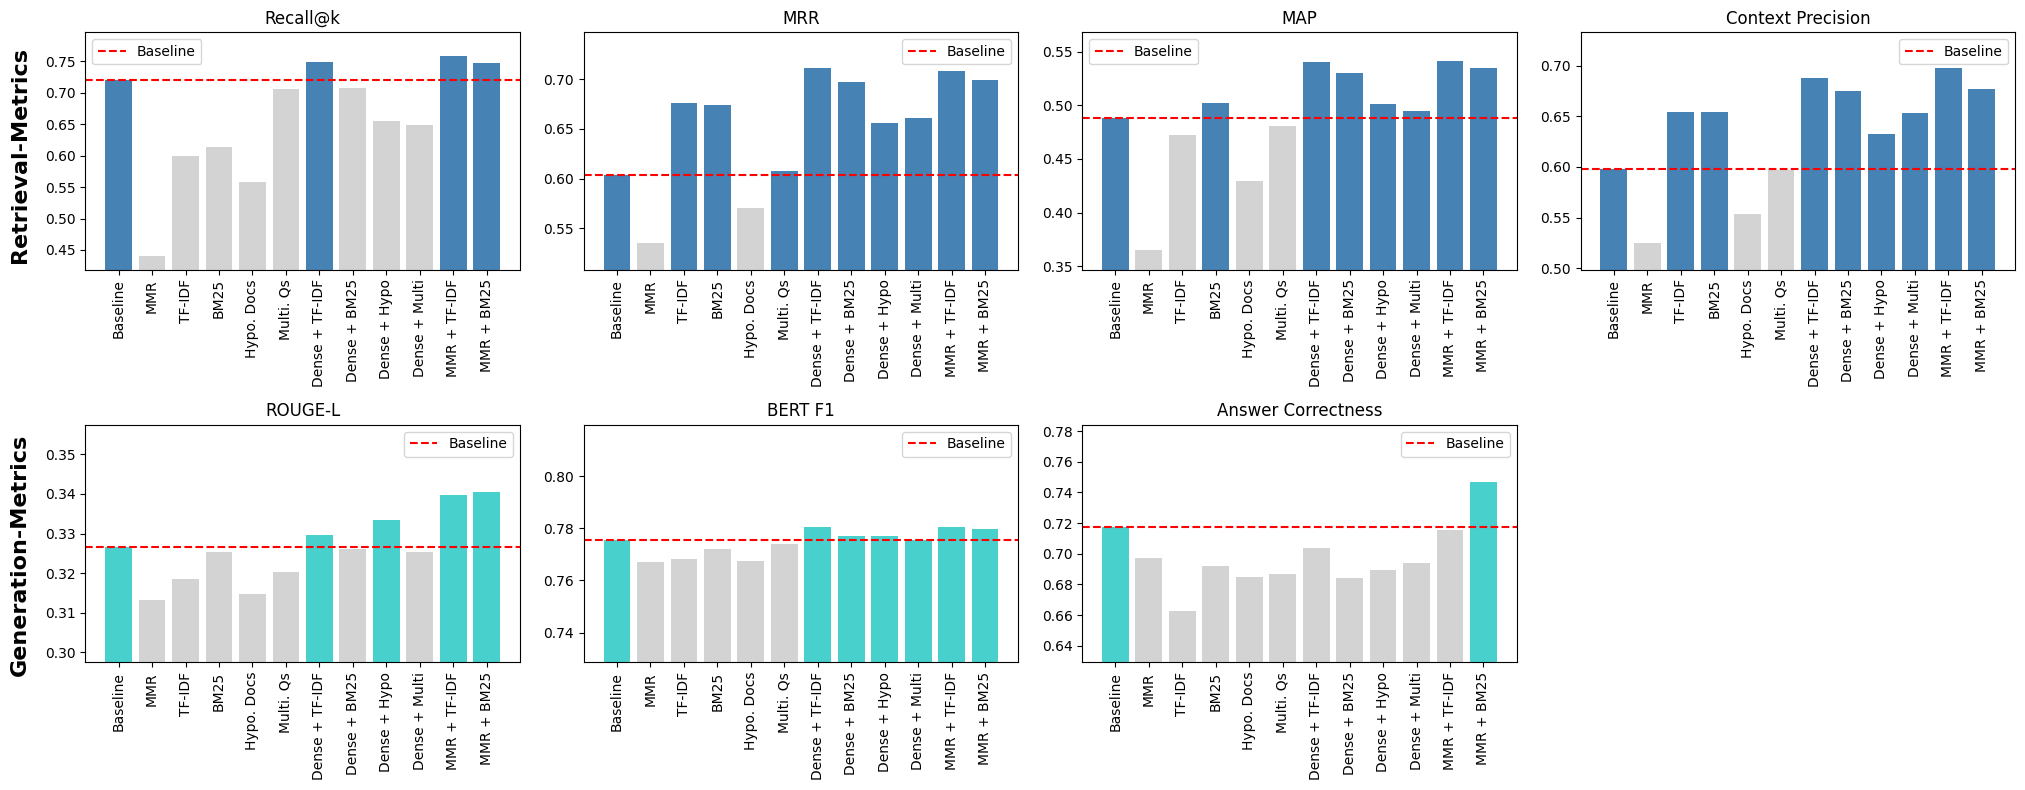

In [ ]:
# Code Generated with the help of ChatGPT

import pandas as pd
import matplotlib.pyplot as plt

# ---- Daten ----
rows = [
    ["Dense", "Baseline", 0.7197, 0.6040, 0.4880, 0.5979, 0.3266, 0.7756, 0.7175],
    ["Dense", "MMR", 0.4407, 0.5350, 0.3649, 0.5247, 0.3132, 0.7670, 0.6974],
    ["Sparse", "TF-IDF", 0.6000, 0.6757, 0.4724, 0.6548, 0.3185, 0.7682, 0.6624],
    ["Sparse", "BM25", 0.6143, 0.6740, 0.5019, 0.6541, 0.3253, 0.7721, 0.6920],
    ["Rewrite", "Hypo. Docs", 0.5583, 0.5707, 0.4295, 0.5533, 0.3147, 0.7674, 0.6850],
    ["Rewrite", "Multi. Qs", 0.7063, 0.6073, 0.4805, 0.5966, 0.3202, 0.7741, 0.6866],
    ["Hybrid", "Dense + TF-IDF", 0.7490, 0.7117, 0.5404, 0.6884, 0.3296, 0.7806, 0.7037],
    ["Hybrid", "Dense + BM25", 0.7077, 0.6970, 0.5301, 0.6752, 0.3262, 0.7770, 0.6843],
    ["Hybrid", "Dense + Hypo", 0.6557, 0.6557, 0.5009, 0.6325, 0.3334, 0.7770, 0.6891],
    ["Hybrid", "Dense + Multi", 0.6490, 0.6607, 0.4946, 0.6533, 0.3253, 0.7756, 0.6940],
    ["Hybrid", "MMR + TF-IDF", 0.7583, 0.7083, 0.5412, 0.6982, 0.3398, 0.7803, 0.7155],
    ["Hybrid", "MMR + BM25", 0.7477, 0.6990, 0.5350, 0.6768, 0.3404, 0.7798, 0.7468],
]
cols = ["Category", "Retriever", "Recall@k", "MRR", "MAP", "Context Precision", "ROUGE-L", "BERT F1", "Answer Correctness"]
df = pd.DataFrame(rows, columns=cols)

retrievers = df["Retriever"]
metrics_retrieval = ["Recall@k", "MRR", "MAP", "Context Precision"]
metrics_generation = ["ROUGE-L", "BERT F1", "Answer Correctness"]

# ---- Plot ----
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

# ---- Hilfsfunktion für Subplots mit Baseline ----
def plot_metric(ax, metric, color="steelblue"):
    values = df[metric]
    baseline_value = df.loc[df["Retriever"] == "Baseline", metric].values[0]

    # Farben anpassen: unterhalb Baseline grau
    bar_colors = [color if val >= baseline_value else "lightgray" for val in values]

    ax.bar(retrievers, values, color=bar_colors)
    ax.axhline(baseline_value, color="red", linestyle="--", linewidth=1.5, label="Baseline")
    ax.set_title(metric)
    ax.set_xticklabels(retrievers, rotation=90)
    ax.set_ylim(values.min() * 0.95, values.max() * 1.05)
    ax.legend()

# ---- Retrieval-Metriken ----
for i, metric in enumerate(metrics_retrieval):
    plot_metric(axes[i], metric, color="steelblue")

# ---- Generation-Metriken ----
for j, metric in enumerate(metrics_generation, start=4):
    plot_metric(axes[j], metric, color="mediumturquoise")

# Letzten leeren Subplot entfernen
fig.delaxes(axes[-1])

# ---- Zwischenüberschriften ----
fig.text(-0.005, 0.80, "Retrieval-Metrics", ha="center", va="center", fontsize=16, fontweight="bold", rotation=90)
fig.text(-0.005, 0.30, "Generation-Metrics", ha="center", va="center", fontsize=16, fontweight="bold", rotation=90)


plt.tight_layout()
plt.savefig("retriever_selection_metrics.png", dpi=300, bbox_inches='tight')
plt.show()
